# Let's Start

In [1]:
# First we will import all the basic libraries

%matplotlib inline
import numpy as np                    # For mathematical computation
import pandas as pd                   # To work with dataframe
import seaborn as sns
import matplotlib.pyplot as plt       # For graphical analysis   

In [2]:
df = pd.read_csv('M1.csv')

After reading the dataset now we will look at the first five rows of dataset to see the format of dataset

In [3]:
df.head()

,Date,CIPLA,TCS,Britania,Close,Honda
0,8/18/2015,683.799988,1370.449951,1658.250000,543.174988,1295.199951
1,8/19/2015,696.099976,1366.800049,1646.780029,540.924988,1302.250000
2,8/20/2015,691.599976,1343.430054,1612.199951,537.349976,1284.650024
3,8/21/2015,697.400024,1338.069946,1599.680054,530.650024,1269.000000
4,8/24/2015,635.849976,1289.319946,1501.119995,509.524994,1144.250000


As we can see the date is in format of mm-dd-yyyy so we will use the pandas datetime function to convert into format of yyyy-mm-dd

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.head()

,Date,CIPLA,TCS,Britania,Close,Honda
0,2015-08-18,683.799988,1370.449951,1658.250000,543.174988,1295.199951
1,2015-08-19,696.099976,1366.800049,1646.780029,540.924988,1302.250000
2,2015-08-20,691.599976,1343.430054,1612.199951,537.349976,1284.650024
3,2015-08-21,697.400024,1338.069946,1599.680054,530.650024,1269.000000
4,2015-08-24,635.849976,1289.319946,1501.119995,509.524994,1144.250000


In [6]:
df = df.rename(columns = {'Close' : 'hdfc'})

First thing i will do is quickly see the trend of stock prices in given period of time using line chart

C:\Users\User-1\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


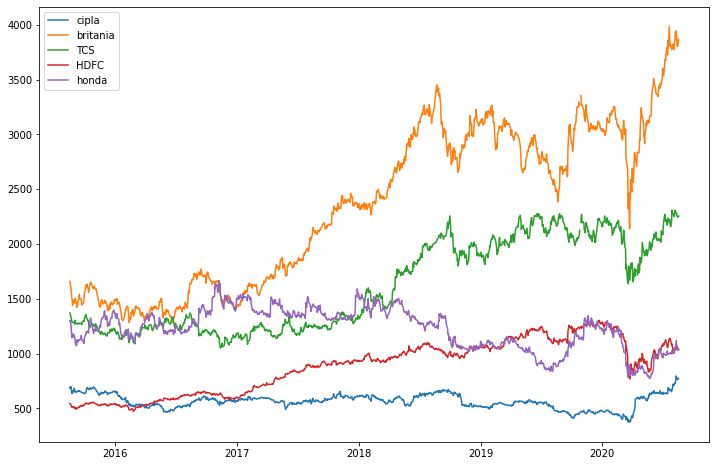

In [7]:
plt.figure(figsize = (12,8))
plt.plot(df['Date'] , df['CIPLA'] , label='cipla')
plt.plot(df['Date'] , df['Britania'] , label = 'britania')
plt.plot(df['Date'] , df['TCS'] ,  label = 'TCS')
plt.plot(df['Date'] , df['hdfc'] ,  label = 'HDFC')
plt.plot(df['Date'] , df['Honda'] ,  label = 'honda')
plt.legend()
plt.show()

In [8]:
df = df.set_index(['Date'])

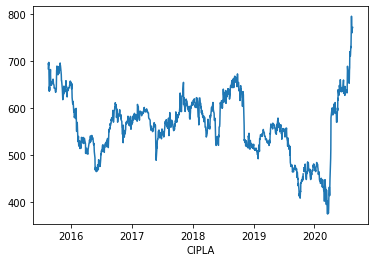

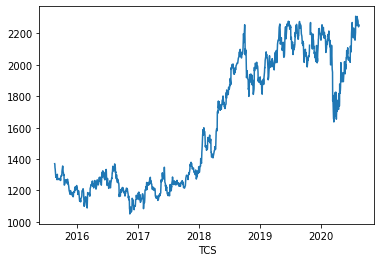

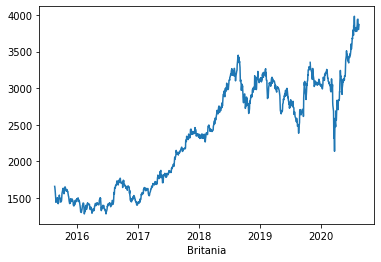

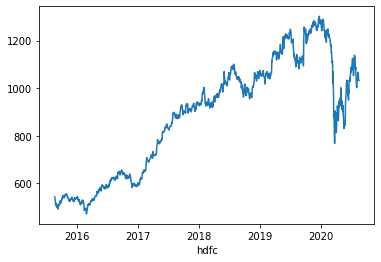

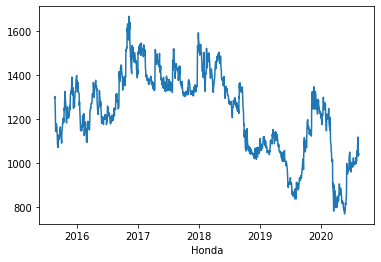

In [9]:
for i in df.columns:
    plt.plot(df[i])
    plt.xlabel(i)
    plt.show()

So if you look the above graph u can analyze that the price of TCS and britania stock steeply icreased from 2015 to 2020 there is slight increase in HDFC and there is decrease in price in honda but price of Cipla is almost same in 4 years. And if you clearly look there is decrease in prices of all 5 stocks around 2020 - 03 i.e start of pandemic . Stocks like TCS and britania again increased but stocks like hdfc and honda are still decreasing

Now we wil create a dataframe of returns from given dataframe of prices

In [10]:
returns = df.pct_change()
returns.dropna(inplace = True)
returns.head()

,CIPLA,TCS,Britania,hdfc,Honda
Date,,,,,
2015-08-19,0.017988,-0.002663,-0.006917,-0.004142,0.005443
2015-08-20,-0.006465,-0.017098,-0.020999,-0.006609,-0.013515
2015-08-21,0.008386,-0.003990,-0.007766,-0.012469,-0.012182
2015-08-24,-0.088256,-0.036433,-0.061612,-0.039810,-0.098306
2015-08-25,0.015019,-0.004460,-0.008440,-0.000589,0.028184


For eg the third value in the CIPLA column is 0.008386 which means that there is 0.8 % in increase in price compared to previous day's price

### First thing we will do is to check make the descriptive statistics table

In [11]:
stat = returns.describe()
stat

,CIPLA,TCS,Britania,hdfc,Honda
count,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000
mean,0.000250,0.000534,0.000835,0.000628,0.000049
std,0.017500,0.016039,0.017064,0.014458,0.021330
min,-0.088256,-0.094103,-0.133702,-0.126069,-0.122538
25%,-0.008527,-0.007769,-0.007522,-0.005916,-0.011293
50%,-0.000776,0.000293,-0.000185,0.000472,-0.001746
75%,0.007959,0.008838,0.009001,0.006732,0.008843
max,0.130375,0.098451,0.106111,0.115996,0.123966


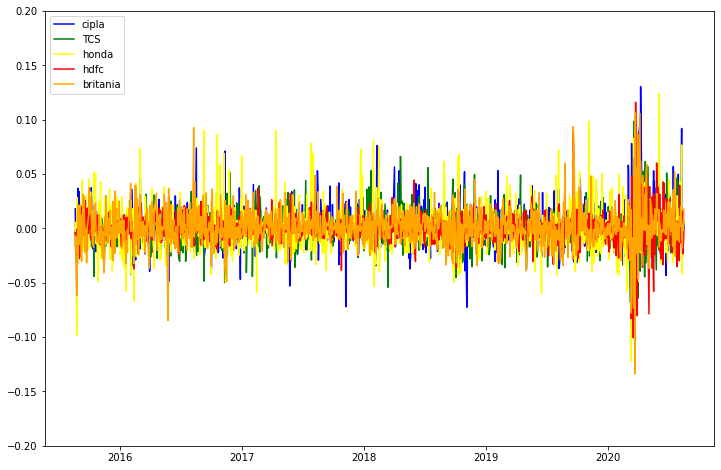

In [12]:
plt.figure(figsize = (12,8))
plt.plot(returns.index , returns['CIPLA'] , color='blue' , label = 'cipla')
plt.plot(returns.index , returns['TCS'] , color='green' , label  = 'TCS')
plt.plot(returns.index , returns['Honda'] , color='yellow' , label = 'honda')
plt.plot(returns.index , returns['hdfc'] , color='red' , label = 'hdfc')
plt.plot(returns.index , returns['Britania'] , color='orange' , label = 'britania')
plt.ylim(-0.20 , 0.20)
plt.legend()
plt.show()

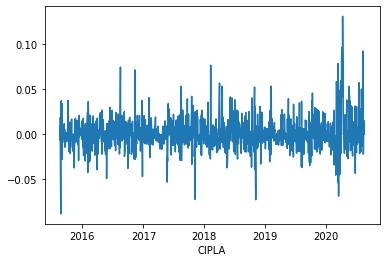

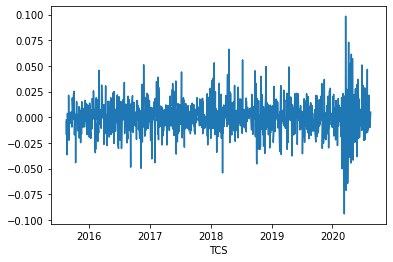

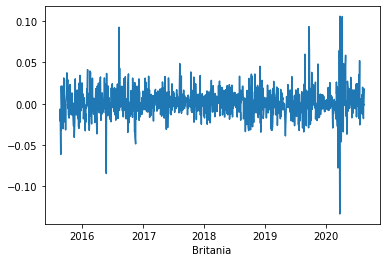

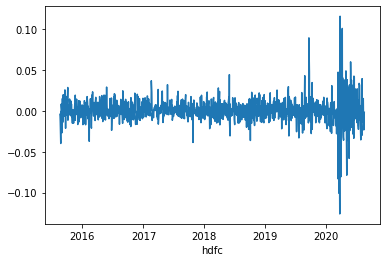

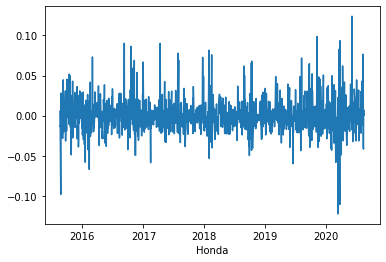

In [13]:
for i in returns.columns:
    plt.plot(returns[i])
    plt.xlabel(i)
    plt.show()

##### CIPLA

 So if u look at the bar chart in blue color u can analyze that there is no high negative and high positive returns but till start of 2020 but there is significant negative return in the periof of march to may 2020.
 
##### Britania

But when you look at bar chart which is orange n color u will see many instances where ther is high positive returns .

### Skewness and Kurtosis

In [14]:
returns.skew()

CIPLA       0.874109
TCS         0.023097
Britania    0.245059
hdfc       -0.229293
Honda       0.631610
dtype: float64

In [15]:
returns.kurtosis()

CIPLA        6.395965
TCS          3.989241
Britania     8.429796
hdfc        15.748054
Honda        4.867975
dtype: float64

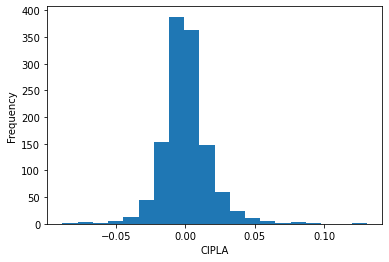

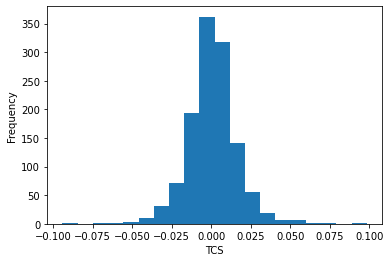

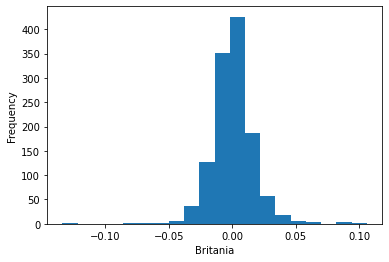

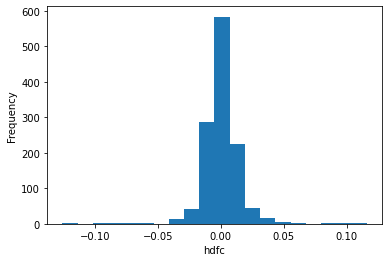

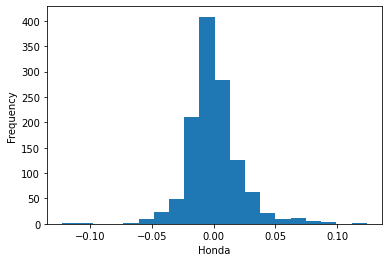

In [16]:
for i in returns.columns:
    returns[i].plot( kind = 'hist' , bins = 20)
    plt.xlabel(i)
    plt.show()

If you look at the graph of TCS , honda , britania and cipla are somewhat positively skewed as it has skewness value like 0.23 , 0.65 , 0.82 and low kurtosis values like 3 , 4 ,6 and 8

HDFC is negatively skewed as well as it has very high kurtosis value


### Boxplot for checking the outliers

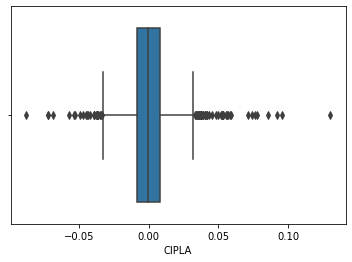

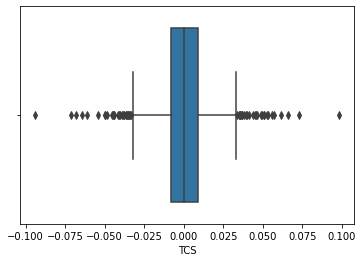

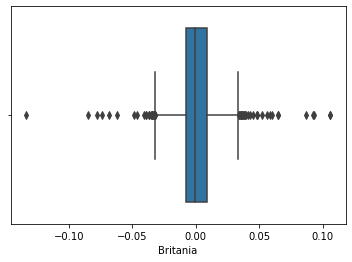

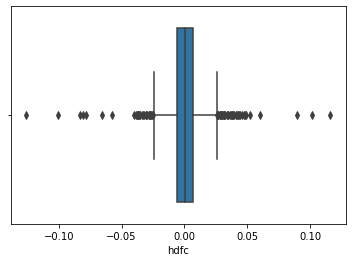

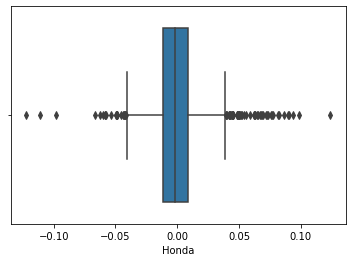

In [17]:
for i in returns.columns:
    sns.boxplot(returns[i])
    plt.show()

### Now we will calculate the annualised return of all stocks using compounded formula

In [18]:
annualised_return = np.prod((1+returns)**(252/len(returns)))-1
annualised_return

CIPLA       0.025113
TCS         0.107441
Britania    0.189869
hdfc        0.140947
Honda      -0.043591
dtype: float64

We can expect 2.51 % profit after one year of investment in CIPLA i.e if we invest 100 we will have 102.51 at the end of one year.

TCS , Britania and Hdfc have good positive annualised return whereas honda has negative return of 4.35 % i.e. if you invest 100 rupees in honda at the end of one year u wil have 95.65 rupees

### Now we will calculate the annualised volatility of all stocks (Check the standard deviation)

In [19]:
annualised_volatility = np.std(returns)*np.sqrt(252)
annualised_volatility

CIPLA       0.277690
TCS         0.254504
Britania    0.270775
hdfc        0.229423
Honda       0.338465
dtype: float64

With negative annualised return honda also has somwhat high volatility compared to others

Honda and Cipla have least returns and high volatilty compared to others

### Sharpe Ratio

The Sharpe ratio was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk.1﻿﻿2

﻿ The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.


Subtracting the risk-free rate from the mean return allows an investor to better isolate the profits associated with risk-taking activities. The risk-free rate of return is the return on an investment with zero risk, meaning it's the return investors could expect for taking no risk. The yield for a U.S. Treasury bond, for example, could be used as the risk-free rate.

Sharpe ratio is just a ratio used to compare stocks , higher the return lower the volatility higher is the sharpe ratio and highe is the sharpe ratio better the stock is

In [20]:
sharpe_ratio = (annualised_return - 0.1) / annualised_volatility
sharpe_ratio

CIPLA      -0.269677
TCS         0.029238
Britania    0.331897
hdfc        0.178478
Honda      -0.424241
dtype: float64

According to sharpe ratio TCS , Britania and hdfc are the stocks to invest.

If u had veiwed the line chart of prices TCS , Britania and hdfc had steep increase in prices compared to others.



### Drawdowns

A drawdown is a peak-to-trough decline during a specific period for an investment, trading account, or fund. A drawdown is usually quoted as the percentage between the peak and the subsequent trough. If a trading account has $10,000 in it, and the funds drop to $9,000 before moving back above $10,000, then the trading account witnessed a 10% drawdown.


Drawdowns are important for measuring the historical risk of different investments, comparing fund performance, or monitoring personal trading performance.

In [21]:
wealth_index = 100 * (1 + returns).cumprod()
wealth_index.head()

,CIPLA,TCS,Britania,hdfc,Honda
Date,,,,,
2015-08-19,101.798770,99.733671,99.308309,99.585769,100.544321
2015-08-20,101.140683,98.028392,97.222973,98.927599,99.185460
2015-08-21,101.988891,97.637272,96.467966,97.694120,97.977150
2015-08-24,92.987714,94.080046,90.524348,93.804944,88.345433
2015-08-25,94.384328,93.660476,89.760287,93.749716,90.835396


Wealth index show the daily money in ur hand if you have invested 100 rupees in each stock.

In [22]:
peaks = wealth_index.cummax()

In [23]:
drawdown = (wealth_index - peaks) /peaks
drawdown.head()

,CIPLA,TCS,Britania,hdfc,Honda
Date,,,,,
2015-08-19,0.000000,0.000000,0.000000,0.000000,0.000000
2015-08-20,-0.006507,-0.017396,-0.021449,-0.006653,-0.013700
2015-08-21,0.000000,-0.021471,-0.029443,-0.019363,-0.026202
2015-08-24,-0.096800,-0.060094,-0.097034,-0.061626,-0.138082
2015-08-25,-0.080570,-0.064843,-0.106372,-0.062251,-0.106885


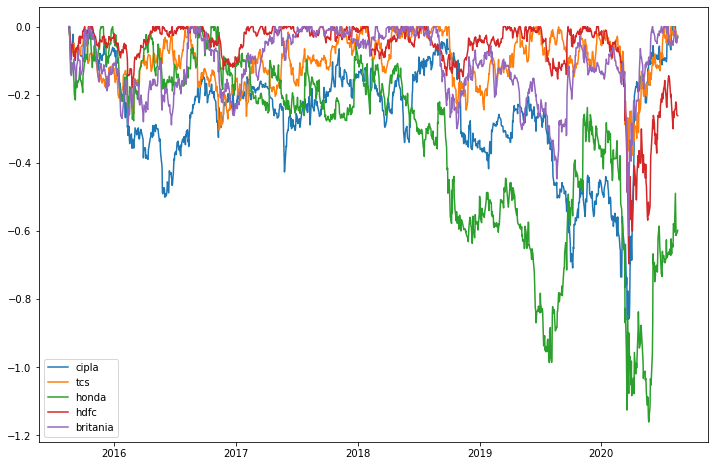

In [24]:
plt.figure(figsize = (12,8))
plt.plot(drawdown['CIPLA'] , label = 'cipla')
plt.plot(drawdown['TCS'] , label = 'tcs')
plt.plot(drawdown['Honda'] , label = 'honda')
plt.plot(drawdown['hdfc'] , label = 'hdfc')
plt.plot(drawdown['Britania'] , label = 'britania')
plt.legend()
plt.show()

TCS , Britania and HDFC have least drawdown so this also the reason why these stocks are better

### Now we will analyze value at risk (VAR) at 95 % confidence

In [25]:
returns['TCS'] = returns['TCS'].sort_values(ascending = True)
var_tcs = returns['TCS'].quantile(0.05)
var_tcs

-0.024359472800080616

This value indicates that there is 5% chance that return will be less than -2.43 %

In [26]:
returns['Britania'] = returns['Britania'].sort_values(ascending = True)
var_britania = returns['Britania'].quantile(0.05)
var_britania

-0.023423395841160665

This value indicates that there is 5% chance that return will be less than -2.34 %

In [27]:
returns['hdfc'] = returns['hdfc'].sort_values(ascending = True)
var_hdfc = returns['hdfc'].quantile(0.05)
var_hdfc

-0.017605169294020073

This value indicates that there is 5% chance that return will be less than -1.76 %

In [28]:
returns['Honda'] = returns['Honda'].sort_values(ascending = True)
var_honda = returns['Honda'].quantile(0.05)
var_honda

-0.029302496798421715

This value indicates that there is 5% chance that return will be less than -2.93 %

In [29]:
returns['CIPLA'] = returns['CIPLA'].sort_values(ascending = True)
var_cipla = returns['CIPLA'].quantile(0.05)
var_cipla

-0.023670452016770233

This value indicates that there is 5% chance that return will be less than -2.36 %

### VAR gives the maximum loss at 95 % confidence interval


### The least VAR are for hdfc , britania and tcs

# After analysing last 5 years data now we will analyse last 1 year data i.e. pre and post lockdown

In [30]:
df1 = df.loc['2019-07-01':]
df1.head()

,CIPLA,TCS,Britania,hdfc,Honda
Date,,,,,
2019-07-01,555.799988,2239.550049,2737.550049,1242.780029,905.000000
2019-07-02,555.349976,2252.100098,2769.250000,1247.500000,934.200012
2019-07-03,553.250000,2237.649902,2794.699951,1244.819946,917.700012
2019-07-04,551.549988,2242.649902,2841.350098,1241.900024,915.849976
2019-07-05,550.000000,2163.100098,2824.850098,1236.199951,906.099976


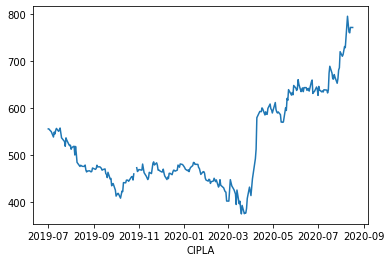

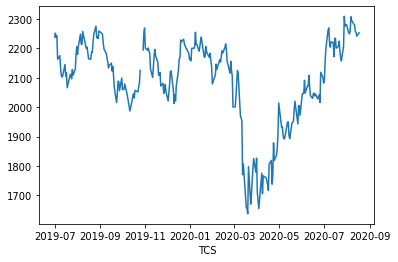

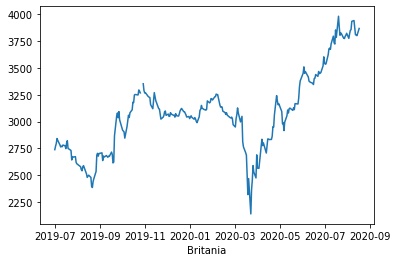

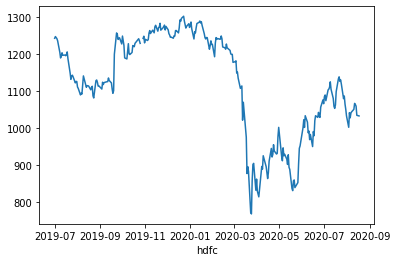

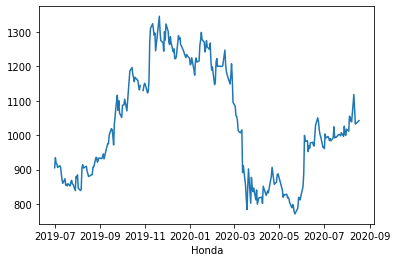

In [31]:
for i in df1.columns:
    plt.plot(df1[i])
    plt.xlabel(i)
    plt.show()

 #### BOOM BAM !!

If u look at all the graphs aound 2020-03 all companies showed steep decline in prices except cipla which is pharmaceutical company which showed a steep increase almost a vertical line

In [32]:
returns1 = df1.pct_change()
returns1.dropna(inplace=True)

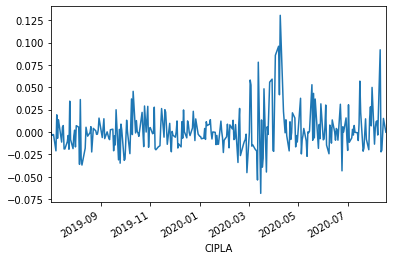

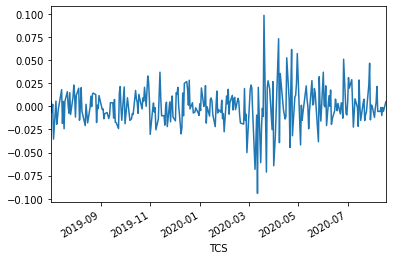

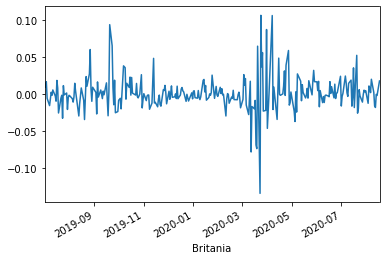

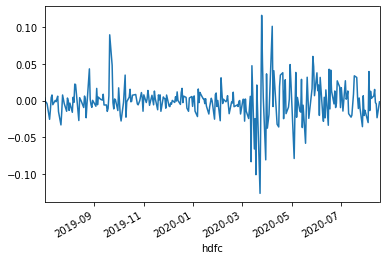

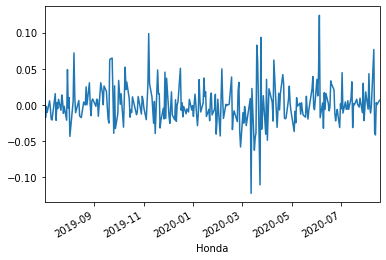

In [33]:
for i in returns1.columns:
    returns1[i].plot()
    plt.xlabel(i)
    plt.show()

If you also look at the returns u will be able to see that except cipla all have highly negative returns during the pandemic period whereas cipla had positive returns

### Annualised Returns

In [34]:
annualised_return1 = np.prod((1+returns1))-1
annualised_return1

CIPLA       0.388359
TCS         0.006184
Britania    0.413180
hdfc       -0.169000
Honda       0.151768
dtype: float64

### Annualised Volatility

In [35]:
annualised_volatility1 = np.std(returns1)
annualised_volatility1

CIPLA       0.023201
TCS         0.020922
Britania    0.023285
hdfc        0.024460
Honda       0.027717
dtype: float64

### Sharpe Ratio

In [36]:
sharpe_ratio1 = (annualised_return1 - 0.1) / annualised_volatility1
sharpe_ratio1

CIPLA       12.428505
TCS         -4.484177
Britania    13.449642
hdfc       -10.997361
Honda        1.867736
dtype: float64

Just to say which is better we can say that CIPLA and britania are better but almost all stocks are affected by pandemic since most of the stocks have negative or low returns compared to previous year prices

### Drawdown and wealth index

In [37]:
wealth_index1 = 100 * (1 + returns1).cumprod()
wealth_index1.head()

,CIPLA,TCS,Britania,hdfc,Honda
Date,,,,,
2019-07-02,99.919033,100.560383,101.157968,100.379791,103.226521
2019-07-03,99.541204,99.915155,102.087629,100.164141,101.403316
2019-07-04,99.235336,100.138414,103.791713,99.929191,101.198892
2019-07-05,98.956461,96.586370,103.188985,99.470536,100.121544
2019-07-08,96.878378,97.135579,101.592660,96.943950,100.685084


In [38]:
peaks1 = wealth_index1.cummax()

In [39]:
drawdown1 = (wealth_index1 - peaks1) /wealth_index1
drawdown1.head()

,CIPLA,TCS,Britania,hdfc,Honda
Date,,,,,
2019-07-02,0.000000,0.000000,0.000000,0.000000,0.000000
2019-07-03,-0.003796,-0.006458,0.000000,-0.002153,-0.017980
2019-07-04,-0.006890,-0.004214,0.000000,-0.004509,-0.020036
2019-07-05,-0.009727,-0.041145,-0.005841,-0.009141,-0.031012
2019-07-08,-0.031386,-0.035258,-0.021646,-0.035442,-0.025241


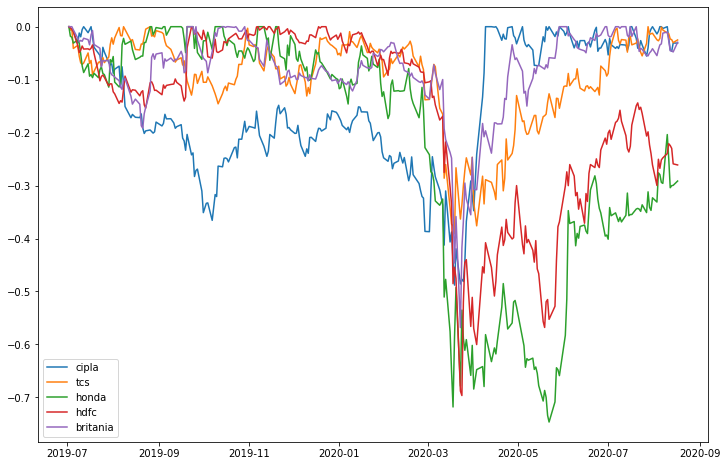

In [40]:
plt.figure(figsize = (12,8))
plt.plot(drawdown1['CIPLA'] , label = 'cipla')
plt.plot(drawdown1['TCS'] , label = 'tcs')
plt.plot(drawdown1['Honda'] , label = 'honda')
plt.plot(drawdown1['hdfc'] , label = 'hdfc')
plt.plot(drawdown1['Britania'] , label = 'britania')
plt.legend()
plt.show()

Just see the graph of drawdown from 2020 - 03 forget the remaining part of graph u can easily see that cipla has least drawdown compared to others. 

It is not even comparable with stocks like honda and hdfc

In [41]:
drawdown1.idxmin()

CIPLA      2020-03-19
TCS        2020-03-19
Britania   2020-03-23
hdfc       2020-03-24
Honda      2020-05-22
dtype: datetime64[ns]

In [42]:
drawdown.min()

CIPLA      -0.861222
TCS        -0.392092
Britania   -0.613804
hdfc       -0.696496
Honda      -1.160558
dtype: float64

So if you see the max drawdown i.e max of minimum returns all the minimum returns are corresponding to MArch 2020

Pandemic has affected a lot if you see the returns it has droped more than 50 %

# Section 2 - Finding portfolio with minimum risk

###### After this much of analysis we found that TCS , Britania and HDFC are better among all 5 stocks . 

###### According to markovitz theorem it is bad idea to invest all money in one stock and in this section i will also give reason that there is minimum reisk and high returen if you investr money in two or more portfolio using risk vs return curve . So I will code to find in what ratio we should invest in both stocks . 

###### According to formula the overall return is weighted average of two stocks but the volatlity is not the weighted average but it also depends on covariance

I will pick two best stocks that is Britania and HDFC

In [43]:
annualised_return1 = np.prod((1+returns[['Britania','hdfc']])**(252/len(returns)))-1
annualised_return1

Britania    0.189869
hdfc        0.140947
dtype: float64

In [44]:
annualised_volatility1 = np.std(returns[['Britania','hdfc']])*np.sqrt(252)
annualised_volatility1

Britania    0.270775
hdfc        0.229423
dtype: float64

In [45]:
cov = returns[['Britania','hdfc']].cov()
cov

,Britania,hdfc
Britania,0.000291,0.000095
hdfc,0.000095,0.000209


Now I will define main function to calculate returns and volatility when we invest some weight in stock A and some in B

In [46]:
def portfolio_return(weights , returns):
    return (weights.T @ returns)


def portfolio_volatility(weights , covmat):
    return (weights.T @ covmat @ weights)**0.5

Now I will create a numpy array of weights .

In [47]:
weights_1 = [np.array([w , 1-w]) for w in np.linspace(0 , 1 , 20)]

Now I will plot the efficient frontier

In [48]:
retu = [portfolio_return(w , annualised_return1) for w in weights_1]

In [49]:
risk = [portfolio_volatility(w , cov) for w in weights_1]

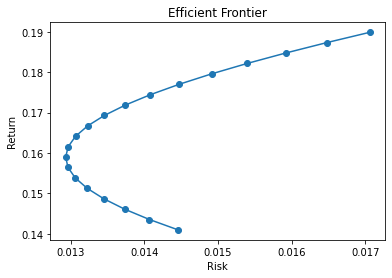

In [50]:
plt.plot(risk , retu , marker='o')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()

On this frontier u can select any portfolio u want .

I u are ready to take high risk u can select portfolio which yeilds high return but has high risk.

Or else u can select portfolio at vertex of parabola having least risk as well as good return

In [51]:
answer = pd.DataFrame(weights_1 , risk , columns = ['% in stock A' , '% in Stock B'])
answer = answer.reset_index()

In [52]:
answer = answer.rename(columns = {'index':'risk'})

In [53]:
pd.set_option('display.max_rows',None)
answer.loc[8]

risk            0.012964
% in stock A    0.421053
% in Stock B    0.578947
Name: 8, dtype: float64

So this the minimum risk i.e. 1.29%

You should invest 42 % in britania and 58 % in HDFC

###### This above result we got it from counting whic dot is it from right or we can also create a dataframe of weight and risk and weight corresponding to minimum risk are the desired result

###### But now we will create a function which will give us minimum risk as well the optimum weights corresponding to minimum risk.

In [54]:
from scipy.optimize import minimize

def minimize_vol(target_return, ret , cov):
    """
    Returns the optimal weight that achieve the target return
    given a set of expected returns and a covariance matrix
    """
    n = ret.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weight_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                       'args': (ret,),
                        'fun': lambda weights, ret: target_return - portfolio_return(weights, ret)
    }
    weight = minimize(portfolio_volatility, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weight_sum_to_1,return_is_target),
                        bounds=bounds)
    return weight.x

In [55]:
weight_2 = minimize_vol(0.16, annualised_return1, cov)
least_vol = [portfolio_volatility(weight_2 , cov)]
least_vol

[0.01293536262996115]

In [56]:
weight_2

array([0.38945353, 0.61054647])

So this are the weights for the target return corresponding to minimal risk

### N - Asset frontier

In [57]:
def optimal_weights(n_points, ret, cov):
    target_rs = np.linspace(ret.min(), ret.max(), n_points)
    weights = [minimize_vol(target_return, ret, cov) for target_return in target_rs]
    return weights

In [58]:
weights = optimal_weights(20 , annualised_return , cov = returns.cov())
risk = [portfolio_volatility(wn , covmat = returns.cov()) for wn in weights]
retturn = [portfolio_return(wn , annualised_return) for wn in weights]

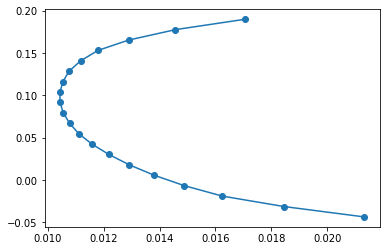

In [59]:
plt.plot(risk , retturn , marker = 'o')
plt.show()

In [60]:
weight_n = minimize_vol(0.12 , annualised_return , cov = returns.cov())
min_vol = [portfolio_volatility(weight_n , covmat = returns.cov())]

In [61]:
print('WEIGHTS')
print(weight_n)
print('MINIMUM RISK')
print(min_vol)

WEIGHTS
[0.18460867 0.27820218 0.22802968 0.30158696 0.0075725 ]
MINIMUM RISK
[0.010599473643406262]


So if you want to invest in all 5 stocks these are the weights and minimum risk associated with that portfolio

# Finding the portfolio having MAX SHARPE RATIO

In [92]:
from scipy.optimize import minimize 
def msr (risk_free_rate , ret , cov):
    n = ret.shape[0]
    init_guess = np.repeat(1/n , n)
    bounds = ((0.0 , 1.0) , ) * n
    
    weight_to_sum_1 = {
        'type' : 'eq',
         'fun' :  lambda weights : np.sum(weights) - 1
    }
    
    def sharpe_ratio(weights , risk_free_rate  , ret , cov):
        r = portfolio_return(weights , ret)
        v = portfolio_volatility(weights , cov)
        sr = (r-risk_free_rate)/v
        return -sr
    
    resultt = minimize(sharpe_ratio , init_guess , args = (risk_free_rate , ret , cov) ,
                       method='SLSQP' ,  
                       constraints = (weight_to_sum_1 ,) , bounds = bounds)
    return resultt.x

In [95]:
weigh = msr( 0.1 , annualised_return , cov = returns.cov())
min_vol = [portfolio_volatility(weigh , covmat = returns.cov())]

In [96]:
print('WEIGHTS')
print(weigh)
print('MINIMUM RISK')
print(min_vol)

WEIGHTS
[0.00000000e+00 4.61467889e-14 8.15379988e-01 1.84620012e-01
 0.00000000e+00]
MINIMUM RISK
[0.015144525767352337]


# THANK YOU FOR READING :)